<a href="https://www.kaggle.com/code/devikasanthosh04/eda-forbes-billionaires-2022?scriptVersionId=148099206" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/forbes-billionaires-2022/2022_forbes_billionaires.csv


In [2]:
df = pd.read_csv('/kaggle/input/forbes-billionaires-2022/2022_forbes_billionaires.csv')
df.head(10)

,Unnamed: 0,rank,name,networth,age,country,source,industry
0,0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments
5,5,6,Larry Page,$111 B,49,United States,Google,Technology
6,6,7,Sergey Brin,$107 B,48,United States,Google,Technology
7,7,8,Larry Ellison,$106 B,77,United States,software,Technology
8,8,9,Steve Ballmer,$91.4 B,66,United States,Microsoft,Technology
9,9,10,Mukesh Ambani,$90.7 B,64,India,diversified,Diversified


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2600 non-null   int64 
 1   rank        2600 non-null   int64 
 2   name        2600 non-null   object
 3   networth    2600 non-null   object
 4   age         2600 non-null   int64 
 5   country     2600 non-null   object
 6   source      2600 non-null   object
 7   industry    2600 non-null   object
dtypes: int64(3), object(5)
memory usage: 162.6+ KB


In [4]:
df = df.drop(['Unnamed: 0'],axis=1)

In [5]:
df.head()

,rank,name,networth,age,country,source,industry
0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments


In [6]:
df.tail(10)

,rank,name,networth,age,country,source,industry
2590,2578,Carl DeSantis,$1 B,82,United States,energy drink,Food & Beverage
2591,2578,Sefik Yilmaz Dizdar,$1 B,84,Turkey,fashion retail,Fashion & Retail
2592,2578,Charles Dunstone,$1 B,58,United Kingdom,mobile phones,Telecom
2593,2578,Larry Fink,$1 B,69,United States,money management,Finance & Investments
2594,2578,Fu Gang,$1 B,51,China,pharma retailing,Healthcare
2595,2578,Jorge Gallardo Ballart,$1 B,80,Spain,pharmaceuticals,Healthcare
2596,2578,Nari Genomal,$1 B,82,Philippines,apparel,Fashion & Retail
2597,2578,Ramesh Genomal,$1 B,71,Philippines,apparel,Fashion & Retail
2598,2578,Sunder Genomal,$1 B,68,Philippines,garments,Fashion & Retail
2599,2578,Horst-Otto Gerberding,$1 B,69,Germany,flavors and fragrances,Food & Beverage


In [7]:
df.iloc[100]

rank                 100
name          Peter Woo 
networth           $17 B
age                   75
country        Hong Kong
source       real estate
industry    Real Estate 
Name: 100, dtype: object

In [8]:
df.describe()

,rank,age
count,2600.000000,2600.000000
mean,1269.570769,64.271923
std,728.146364,13.220607
min,1.000000,19.000000
25%,637.000000,55.000000
50%,1292.000000,64.000000
75%,1929.000000,74.000000
max,2578.000000,100.000000


In [9]:
df.isnull().sum()

rank        0
name        0
networth    0
age         0
country     0
source      0
industry    0
dtype: int64

# Countries containing most number of Billionaires

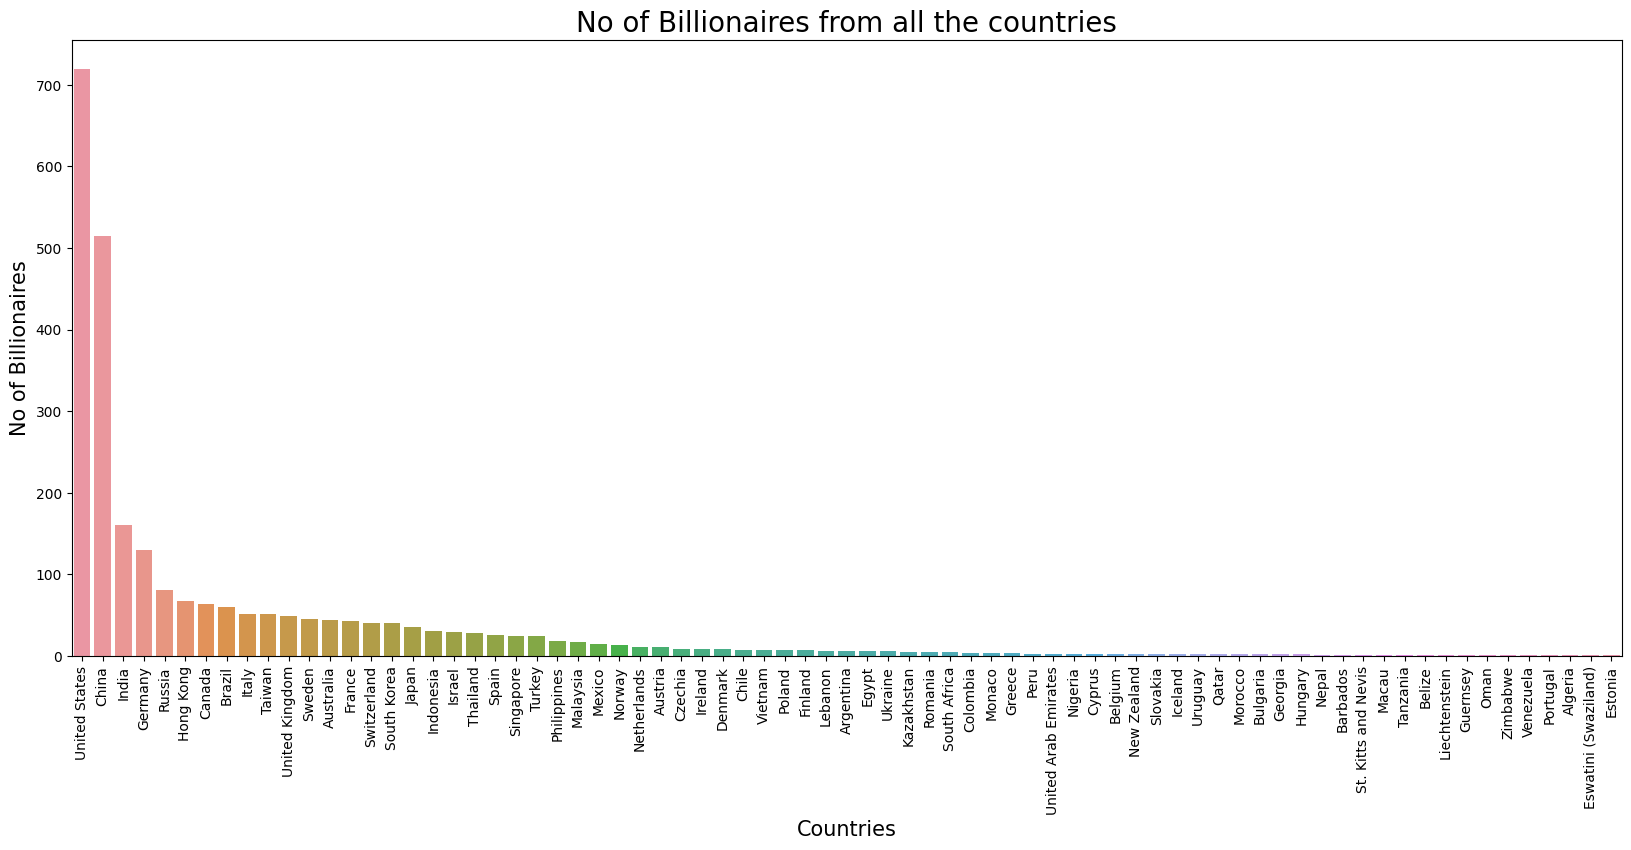

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,8))
sns.countplot( data=df, x="country", order=df['country'].value_counts().index)
plt.xticks(rotation=90)
plt.ylabel("No of Billionaires", fontsize=15)
plt.xlabel("Countries", fontsize=15)
plt.title("No of Billionaires from all the countries", fontsize=20)
plt.show()

In [11]:
df['country'].value_counts().nlargest(10)

country
United States    719
China            515
India            161
Germany          130
Russia            81
Hong Kong         67
Canada            64
Brazil            60
Italy             52
Taiwan            51
Name: count, dtype: int64

In [12]:
df['country'].unique()

array(['United States', 'France', 'India', 'Mexico', 'China', 'Canada',
       'Spain', 'Germany', 'Hong Kong', 'Italy', 'Australia', 'Austria',
       'Japan', 'Indonesia', 'Switzerland', 'Chile', 'Russia',
       'Singapore', 'Sweden', 'Czechia', 'United Kingdom', 'Brazil',
       'Israel', 'Netherlands', 'Ireland', 'Nigeria', 'Denmark',
       'Thailand', 'Cyprus', 'Malaysia', 'Taiwan', 'Monaco', 'Colombia',
       'New Zealand', 'South Korea', 'Belgium', 'South Africa',
       'Philippines', 'Egypt', 'Greece', 'Norway', 'Vietnam', 'Poland',
       'Eswatini (Swaziland)', 'Peru', 'Algeria', 'Kazakhstan', 'Georgia',
       'Portugal', 'Turkey', 'Finland', 'Ukraine', 'Argentina', 'Belize',
       'Venezuela', 'Lebanon', 'Zimbabwe', 'Romania',
       'United Arab Emirates', 'Oman', 'Iceland', 'Guernsey',
       'Liechtenstein', 'Qatar', 'Morocco', 'Bulgaria', 'Macau',
       'Slovakia', 'Barbados', 'Uruguay', 'Nepal', 'Tanzania',
       'St. Kitts and Nevis', 'Hungary', 'Estonia'], dty

In [13]:
len(df['country'].unique())

75

# Ages of Billionaires

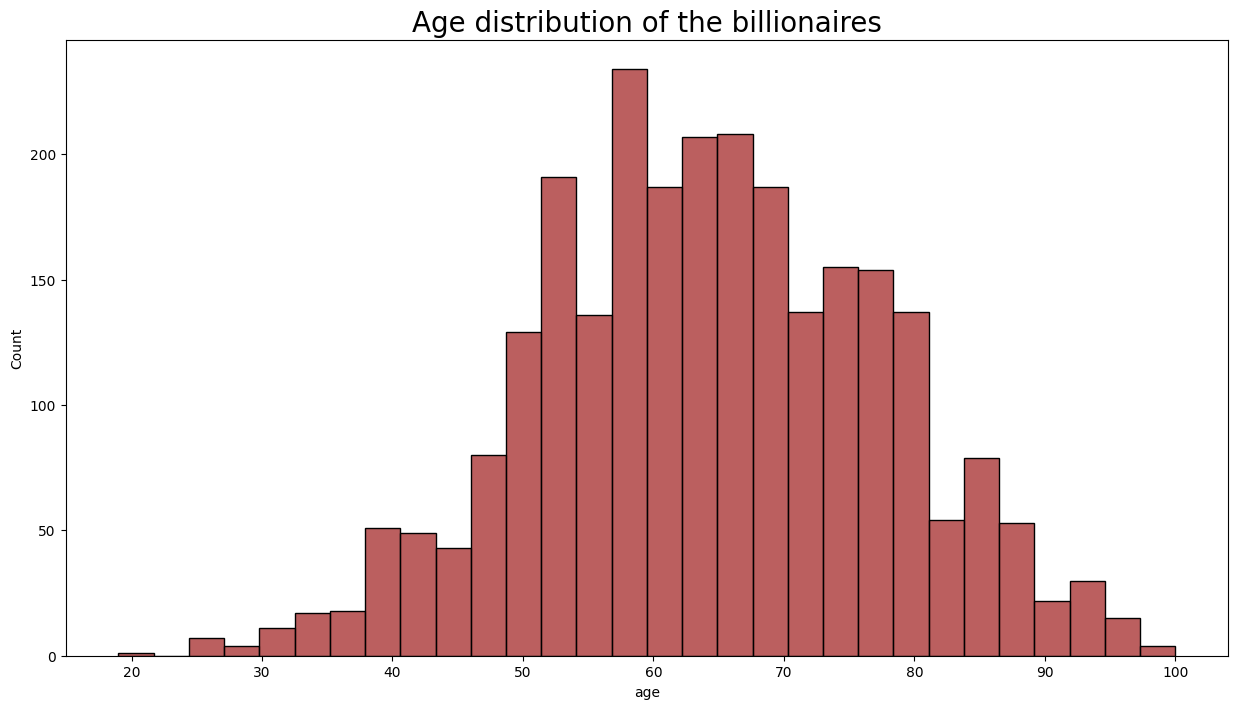

In [14]:
plt.figure(figsize = (15,8))
sns.histplot(data = df, x = 'age', color = 'brown')
plt.title('Age distribution of the billionaires',fontsize=20)
plt.show()

# Who is the youngest and eldest?

In [15]:
df.loc[df.age == df.age.min()] 

,rank,name,networth,age,country,source,industry
1311,1292,Kevin David Lehmann,$2.4 B,19,Germany,drugstores,Fashion & Retail


In [16]:
df.loc[df.age == df.age.max()] 

,rank,name,networth,age,country,source,industry
1681,1645,George Joseph,$1.8 B,100,United States,insurance,Finance & Investments


In [17]:
df['age_group'] = pd.cut(df['age'],bins = [18, 30, 50, 70, 100], include_lowest = True,labels = ['18-30', '30-50', '50-70','70+'])
df.head()

,rank,name,networth,age,country,source,industry,age_group
0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive,30-50
1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology,50-70
2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail,70+
3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology,50-70
4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments,70+


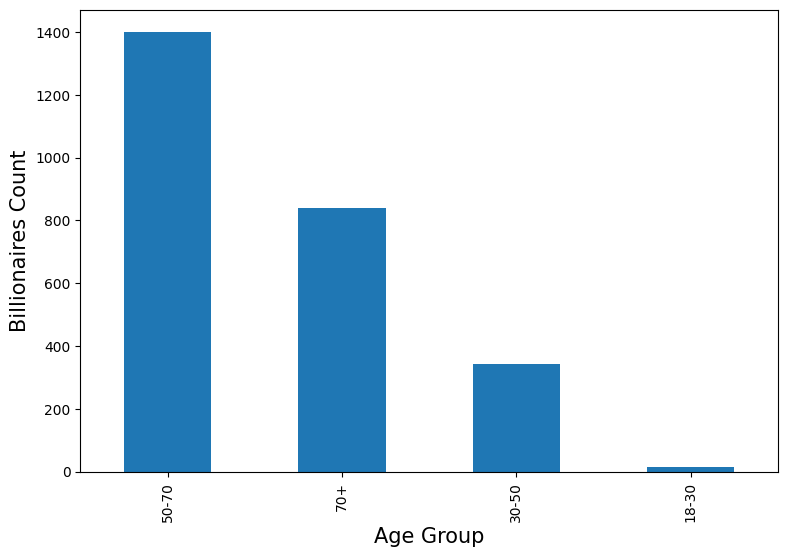

In [18]:
df['age_group'].value_counts().plot(kind='bar', figsize=(9,6))
plt.xlabel("Age Group", fontsize=15)
plt.ylabel("Billionaires Count", fontsize=15)
plt.show()

# Which field has most of the billionaires?

In [19]:
df['networth']= df['networth'].str.replace('$', '').str.replace(' B', '').astype(float)

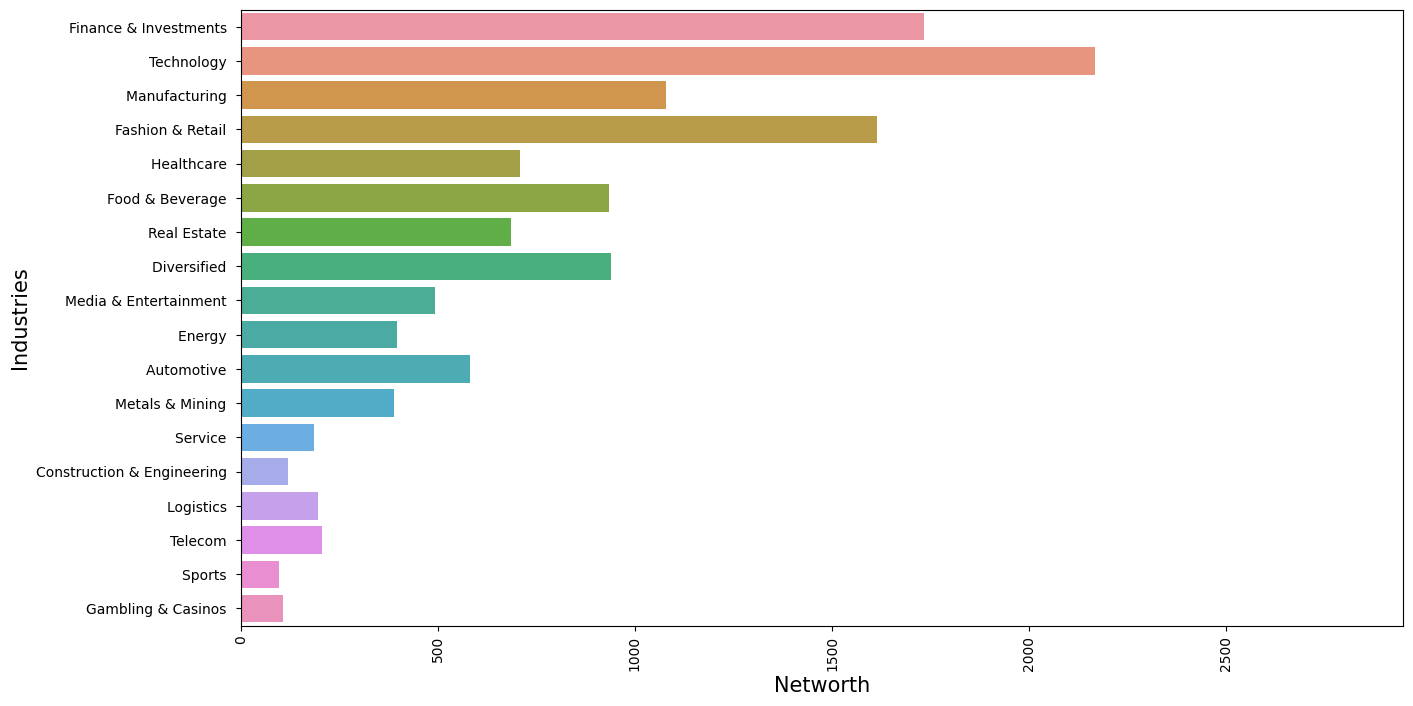

In [20]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x = "networth", y = "industry", order = df['industry'].value_counts().index, estimator = sum , errwidth = 0)
plt.xticks(rotation=90)
plt.xlabel("Networth", fontsize=15)
plt.ylabel("Industries", fontsize=15)
plt.show()

# See whether money and age related

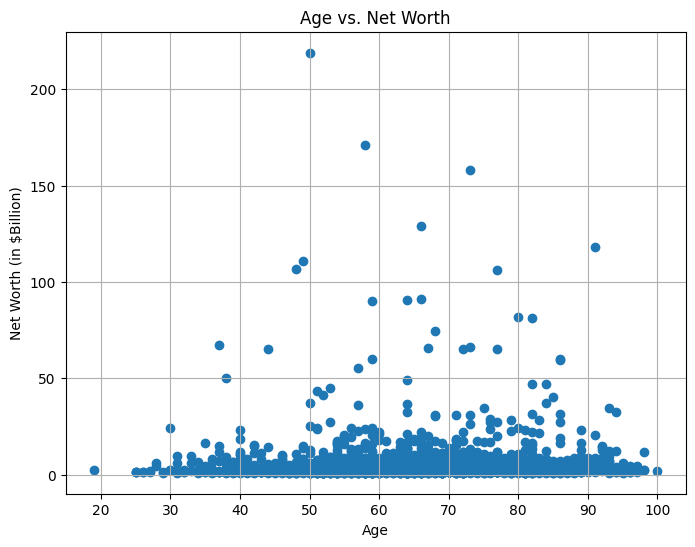

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['networth'])
plt.xlabel('Age')
plt.ylabel('Net Worth (in $Billion)')
plt.title('Age vs. Net Worth')
plt.grid(True)

# Top few billionaires from India

In [22]:
indians = df[df['country'] == 'India']

In [23]:
top_5_indians = indians.sort_values('networth',ascending=False).head()

In [24]:
print(top_5_indians)

    rank                    name  networth  age country  \
9     10          Mukesh Ambani       90.7   64   India   
10    11  Gautam Adani & family       90.0   59   India   
46    47             Shiv Nadar       28.7   76   India   
56    56       Cyrus Poonawalla       24.3   80   India   
80    81     Radhakishan Damani       20.0   67   India   

                         source           industry age_group  
9                   diversified       Diversified      50-70  
10  infrastructure, commodities       Diversified      50-70  
46            software services        Technology        70+  
56                     vaccines        Healthcare        70+  
80          retail, investments  Fashion & Retail      50-70  
